### Sentiment Analysis for Customer Reviews: Analyze customer reviews and
sentiment data to categorize them as positive, negative, or neutral, providing
insights for businesses to improve customer satisfaction.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import re
import nltk # NLP toolkit
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
import string
from collections import Counter


In [6]:
df = pd.read_csv('../data/amazon_alexa.tsv', sep= '\t')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [8]:
empty_values = df.isna().sum()
print(empty_values)

spaces_values = (df == ' ').sum()
print(spaces_values)

nan_values = df.isnull().sum()
print(nan_values)

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64
rating               0
date                 0
variation            0
verified_reviews    79
feedback             0
dtype: int64
rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64


In [9]:
df.shape

(3150, 5)

In [10]:
df.dropna(inplace=True)

# Drop rows containing spaces
df = df[~(df == ' ').any(axis=1)]

# Drop rows containing empty values
df = df[df.astype(str).applymap(lambda x: x.strip() != '')]

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

print(df)

      rating       date         variation  \
0          5  31-Jul-18  Charcoal Fabric    
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3065       5  30-Jul-18        Black  Dot   
3066       5  30-Jul-18        Black  Dot   
3067       5  30-Jul-18        Black  Dot   
3068       5  30-Jul-18        White  Dot   
3069       4  29-Jul-18        Black  Dot   

                                       verified_reviews  feedback  
0                                         Love my Echo!         1  
1                                             Loved it!         1  
2     Sometimes while playing a game, you can answer...         1  
3     I have had a lot of fun with this thing. My 4 ...         1  
4                                                 Music         1  
...                                                

C:\Users\werne\AppData\Local\Temp\ipykernel_130436\3382214355.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df[df.astype(str).applymap(lambda x: x.strip() != '')]


In [11]:
empty_values = df.isna().sum()
spaces_values = (df == ' ').sum()
nan_values = df.isnull().sum()

print(empty_values)
print(spaces_values)
print(nan_values)

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64
rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64
rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64


In [12]:
df.shape

(3070, 5)

In [13]:
#We are going to add our data to an array
feedback_data = []

for text in df['verified_reviews']:
    feedback_data.append(text)
feedback_data

['Love my Echo!',
 'Loved it!',
 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.',
 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.',
 'Music',
 'I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.',
 'Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.',
 "I think this is the 5th one I've

In [14]:
text_lower = [text.lower() for text in feedback_data]
text_lower

['love my echo!',
 'loved it!',
 'sometimes while playing a game, you can answer a question correctly but alexa says you got it wrong and answers the same as you.  i like being able to turn lights on and off while away from home.',
 'i have had a lot of fun with this thing. my 4 yr old learns about dinosaurs, i control the lights and play games like categories. has nice sound when playing music as well.',
 'music',
 'i received the echo as a gift. i needed another bluetooth or something to play music easily accessible, and found this smart speaker. can’t wait to see what else it can do.',
 'without having a cellphone, i cannot use many of her features. i have an ipad but do not see that of any use.  it is a great alarm.  if u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.it is fun to ask random questions to hear her response.  she does not seem to be very smartbon politics yet.',
 "i think this is the 5th one i've

### Remove punctuation

In [18]:
arr_punc = [text.translate(str.maketrans('', '', string.punctuation)) for text in text_lower]
arr_punc

['love my echo',
 'loved it',
 'sometimes while playing a game you can answer a question correctly but alexa says you got it wrong and answers the same as you  i like being able to turn lights on and off while away from home',
 'i have had a lot of fun with this thing my 4 yr old learns about dinosaurs i control the lights and play games like categories has nice sound when playing music as well',
 'music',
 'i received the echo as a gift i needed another bluetooth or something to play music easily accessible and found this smart speaker can’t wait to see what else it can do',
 'without having a cellphone i cannot use many of her features i have an ipad but do not see that of any use  it is a great alarm  if u r almost deaf you can hear her alarm in the bedroom from out in the living room so that is reason enough to keep herit is fun to ask random questions to hear her response  she does not seem to be very smartbon politics yet',
 'i think this is the 5th one ive purchased im working o

In [25]:
import emoji

def remove_emojis_whitespace(text_data):
  clean_data = []
  for text in text_data:
    clean_text = emoji.replace_emoji(text, replace='')
    clean_text = clean_text.rstrip()
    clean_data.append(clean_text)
  return clean_data

clean_data = remove_emojis_whitespace(arr_punc)
print(clean_data) 


['love my echo', 'loved it', 'sometimes while playing a game you can answer a question correctly but alexa says you got it wrong and answers the same as you  i like being able to turn lights on and off while away from home', 'i have had a lot of fun with this thing my 4 yr old learns about dinosaurs i control the lights and play games like categories has nice sound when playing music as well', 'music', 'i received the echo as a gift i needed another bluetooth or something to play music easily accessible and found this smart speaker can’t wait to see what else it can do', 'without having a cellphone i cannot use many of her features i have an ipad but do not see that of any use  it is a great alarm  if u r almost deaf you can hear her alarm in the bedroom from out in the living room so that is reason enough to keep herit is fun to ask random questions to hear her response  she does not seem to be very smartbon politics yet', 'i think this is the 5th one ive purchased im working on getti

In [28]:
import nltk
tokenized_data = [nltk.word_tokenize(text) for text in clean_data]
tokenized_data


[['love', 'my', 'echo'],
 ['loved', 'it'],
 ['sometimes',
  'while',
  'playing',
  'a',
  'game',
  'you',
  'can',
  'answer',
  'a',
  'question',
  'correctly',
  'but',
  'alexa',
  'says',
  'you',
  'got',
  'it',
  'wrong',
  'and',
  'answers',
  'the',
  'same',
  'as',
  'you',
  'i',
  'like',
  'being',
  'able',
  'to',
  'turn',
  'lights',
  'on',
  'and',
  'off',
  'while',
  'away',
  'from',
  'home'],
 ['i',
  'have',
  'had',
  'a',
  'lot',
  'of',
  'fun',
  'with',
  'this',
  'thing',
  'my',
  '4',
  'yr',
  'old',
  'learns',
  'about',
  'dinosaurs',
  'i',
  'control',
  'the',
  'lights',
  'and',
  'play',
  'games',
  'like',
  'categories',
  'has',
  'nice',
  'sound',
  'when',
  'playing',
  'music',
  'as',
  'well'],
 ['music'],
 ['i',
  'received',
  'the',
  'echo',
  'as',
  'a',
  'gift',
  'i',
  'needed',
  'another',
  'bluetooth',
  'or',
  'something',
  'to',
  'play',
  'music',
  'easily',
  'accessible',
  'and',
  'found',
  'this',


In [30]:
english_stopwords = set(stopwords.words('english'))

In [31]:
filtered_data = [[word for word in text if word not in english_stopwords] for text in tokenized_data]
filtered_data

[['love', 'echo'],
 ['loved'],
 ['sometimes',
  'playing',
  'game',
  'answer',
  'question',
  'correctly',
  'alexa',
  'says',
  'got',
  'wrong',
  'answers',
  'like',
  'able',
  'turn',
  'lights',
  'away',
  'home'],
 ['lot',
  'fun',
  'thing',
  '4',
  'yr',
  'old',
  'learns',
  'dinosaurs',
  'control',
  'lights',
  'play',
  'games',
  'like',
  'categories',
  'nice',
  'sound',
  'playing',
  'music',
  'well'],
 ['music'],
 ['received',
  'echo',
  'gift',
  'needed',
  'another',
  'bluetooth',
  'something',
  'play',
  'music',
  'easily',
  'accessible',
  'found',
  'smart',
  'speaker',
  '’',
  'wait',
  'see',
  'else'],
 ['without',
  'cellphone',
  'use',
  'many',
  'features',
  'ipad',
  'see',
  'use',
  'great',
  'alarm',
  'u',
  'r',
  'almost',
  'deaf',
  'hear',
  'alarm',
  'bedroom',
  'living',
  'room',
  'reason',
  'enough',
  'keep',
  'herit',
  'fun',
  'ask',
  'random',
  'questions',
  'hear',
  'response',
  'seem',
  'smartbon',
  

In [32]:
lm = WordNetLemmatizer()

# Lemmatize each token
lemmatized_text = [[lm.lemmatize(word) for word in text] for text in filtered_data]
lemmatized_text

[['love', 'echo'],
 ['loved'],
 ['sometimes',
  'playing',
  'game',
  'answer',
  'question',
  'correctly',
  'alexa',
  'say',
  'got',
  'wrong',
  'answer',
  'like',
  'able',
  'turn',
  'light',
  'away',
  'home'],
 ['lot',
  'fun',
  'thing',
  '4',
  'yr',
  'old',
  'learns',
  'dinosaur',
  'control',
  'light',
  'play',
  'game',
  'like',
  'category',
  'nice',
  'sound',
  'playing',
  'music',
  'well'],
 ['music'],
 ['received',
  'echo',
  'gift',
  'needed',
  'another',
  'bluetooth',
  'something',
  'play',
  'music',
  'easily',
  'accessible',
  'found',
  'smart',
  'speaker',
  '’',
  'wait',
  'see',
  'else'],
 ['without',
  'cellphone',
  'use',
  'many',
  'feature',
  'ipad',
  'see',
  'use',
  'great',
  'alarm',
  'u',
  'r',
  'almost',
  'deaf',
  'hear',
  'alarm',
  'bedroom',
  'living',
  'room',
  'reason',
  'enough',
  'keep',
  'herit',
  'fun',
  'ask',
  'random',
  'question',
  'hear',
  'response',
  'seem',
  'smartbon',
  'politics'

In [33]:
stemmer = PorterStemmer()
stemmed_text= [[stemmer.stem(word) for word in text] for text in lemmatized_text]
stemmed_text

[['love', 'echo'],
 ['love'],
 ['sometim',
  'play',
  'game',
  'answer',
  'question',
  'correctli',
  'alexa',
  'say',
  'got',
  'wrong',
  'answer',
  'like',
  'abl',
  'turn',
  'light',
  'away',
  'home'],
 ['lot',
  'fun',
  'thing',
  '4',
  'yr',
  'old',
  'learn',
  'dinosaur',
  'control',
  'light',
  'play',
  'game',
  'like',
  'categori',
  'nice',
  'sound',
  'play',
  'music',
  'well'],
 ['music'],
 ['receiv',
  'echo',
  'gift',
  'need',
  'anoth',
  'bluetooth',
  'someth',
  'play',
  'music',
  'easili',
  'access',
  'found',
  'smart',
  'speaker',
  '’',
  'wait',
  'see',
  'els'],
 ['without',
  'cellphon',
  'use',
  'mani',
  'featur',
  'ipad',
  'see',
  'use',
  'great',
  'alarm',
  'u',
  'r',
  'almost',
  'deaf',
  'hear',
  'alarm',
  'bedroom',
  'live',
  'room',
  'reason',
  'enough',
  'keep',
  'herit',
  'fun',
  'ask',
  'random',
  'question',
  'hear',
  'respons',
  'seem',
  'smartbon',
  'polit',
  'yet'],
 ['think',
  '5th',
 

In [34]:
vocabulary = set([word for text in stemmed_text for word in text])
vocabulary

{'addon',
 'preset',
 'young',
 'refurbish',
 'dish',
 'anticip',
 'itjust',
 '39',
 'everywher',
 'properli',
 'nite',
 'manufacturerslg',
 'god',
 'rough',
 'pic',
 'spotthen',
 'amaz',
 'prior',
 'duti',
 'practic',
 'extra',
 'age',
 'samsunggalaxi',
 'mid',
 'fingertip',
 'point34',
 'straight',
 'pain',
 'six',
 'answer',
 'scoop',
 'glitch',
 'locat',
 'cord',
 'broken',
 'thrill',
 'driver',
 'abc',
 'univers',
 'usessometim',
 'remors',
 'reader',
 'av',
 'tricki',
 'hardli',
 'musthav',
 'tosca',
 'tear',
 'dash',
 'sono',
 'intelag',
 'dial',
 'mama',
 'taskth',
 'standalon',
 'worst',
 'pencil',
 'noti',
 'showtim',
 'contact',
 'bug',
 'complain',
 'roomoth',
 'wasnt',
 'spell',
 'allrecip',
 'ant',
 'system',
 'amus',
 'havent',
 'headlin',
 'unlimit',
 'golden',
 'babi',
 'send',
 'gratament',
 'market',
 'infact',
 'randomli',
 'equip',
 'biggest',
 'companion',
 'pagesth',
 '34',
 'groggi',
 'digitol',
 'relat',
 'disast',
 'rambl',
 'kitchenden',
 'thermostatand',
 'c

In [35]:
pre = ' '.join(vocabulary)
print(pre)

addon preset young refurbish dish anticip itjust 39 everywher properli nite manufacturerslg god rough pic spotthen amaz prior duti practic extra age samsunggalaxi mid fingertip point34 straight pain six answer scoop glitch locat cord broken thrill driver abc univers usessometim remors reader av tricki hardli musthav tosca tear dash sono intelag dial mama taskth standalon worst pencil noti showtim contact bug complain roomoth wasnt spell allrecip ant system amus havent headlin unlimit golden babi send gratament market infact randomli equip biggest companion pagesth 34 groggi digitol relat disast rambl kitchenden thermostatand cook extern black defenc 888 sound ummm agreement 200 plusminu total buld ad overal anythingi musicrel estudio reli greatwith defin del lower musiclaught sooooo storag decent employe water showman shout interact directtv shell worri 34late weight garag grand encyclopedia ranger movi whatsoev 34play killer seamlessnot butnot lightswithout sold world rariti proper tr

In [37]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [38]:
data_series_preprocessed = df['verified_reviews'].apply(preprocess_text)
data_series_preprocessed

0                                               love echo
1                                                   loved
2       sometimes playing game answer question correct...
3       lot fun thing 4 yr old learns dinosaurs contro...
4                                                   music
                              ...                        
3065                         perfect kids adults everyone
3066    listening music searching locations checking t...
3067    love things running entire home tv lights ther...
3068    complaint sound quality isnt great mostly use ...
3069                                                 good
Name: verified_reviews, Length: 3070, dtype: object

In [42]:
import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

sentiments = data_series_preprocessed.apply(
    lambda x: sid.polarity_scores(x)['compound']
)
sentiments

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\werne\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


0       0.6369
1       0.5994
2       0.0516
3       0.9169
4       0.0000
         ...  
3065    0.5719
3066    0.0000
3067    0.9648
3068    0.5277
3069    0.4404
Name: verified_reviews, Length: 3070, dtype: float64

In [43]:
sentiment_class = sentiments.apply(
    lambda x: 'positive' if x > 0 else ('neutral' if x == 0 else 'negative')
)

In [44]:
df_with_sentiment = pd.DataFrame({
    'Review': df['verified_reviews'], 
     'Sentiment': sentiment_class
})

df_with_sentiment

,Review,Sentiment
0,Love my Echo!,positive
1,Loved it!,positive
2,"Sometimes while playing a game, you can answer...",positive
3,I have had a lot of fun with this thing. My 4 ...,positive
4,Music,neutral
...,...,...
3065,"Perfect for kids, adults and everyone in betwe...",positive
3066,"Listening to music, searching locations, check...",neutral
3067,"I do love these things, i have them running my...",positive
3068,Only complaint I have is that the sound qualit...,positive


In [50]:
df_with_sentiment['Sentiment'] = df_with_sentiment['Sentiment'].apply(lambda x: 1 if x == 'positive' else (0 if x == 'neutral' else -1))

df_with_sentiment

,Review,Sentiment
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,0
...,...,...
3065,"Perfect for kids, adults and everyone in betwe...",1
3066,"Listening to music, searching locations, check...",0
3067,"I do love these things, i have them running my...",1
3068,Only complaint I have is that the sound qualit...,1


In [52]:
df_with_sentiment[df_with_sentiment['Sentiment'] == 0]

,Review,Sentiment
4,Music,0
10,"I sent it to my 85 year old Dad, and he talks ...",0
14,Just what I expected....,0
50,"Excelente, lo unico es que no esta en español.",0
60,😍,0
...,...,...
3039,It is just not as loud as I thought it was goi...,0
3055,PHENOMENAL,0
3058,Very convenient,0
3061,Barry,0


In [58]:
df_with_sentiment['Sentiment'].value_counts()

Sentiment
 1    2639
 0     266
-1     165
Name: count, dtype: int64

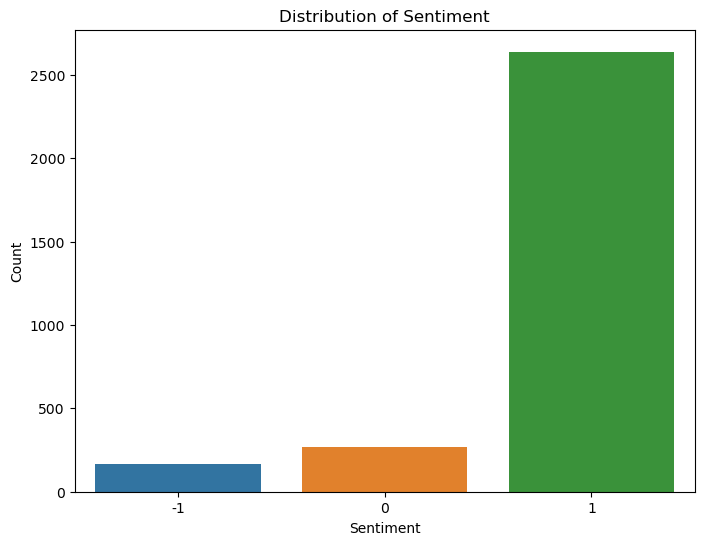

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment_counts = df_with_sentiment['Sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [61]:
positiveFD = nltk.FreqDist(word for text in df_with_sentiment[df_with_sentiment["Sentiment"] == 1]["Review"] for word in text.lower().split())
negativeFD = nltk.FreqDist(word  for text in df_with_sentiment[df_with_sentiment["Sentiment"] == -1]["Review"] for word in text.lower().split())
neutralDF = nltk.FreqDist(word  for text in df_with_sentiment[df_with_sentiment["Sentiment"] == 0]["Review"] for word in text.lower().split())

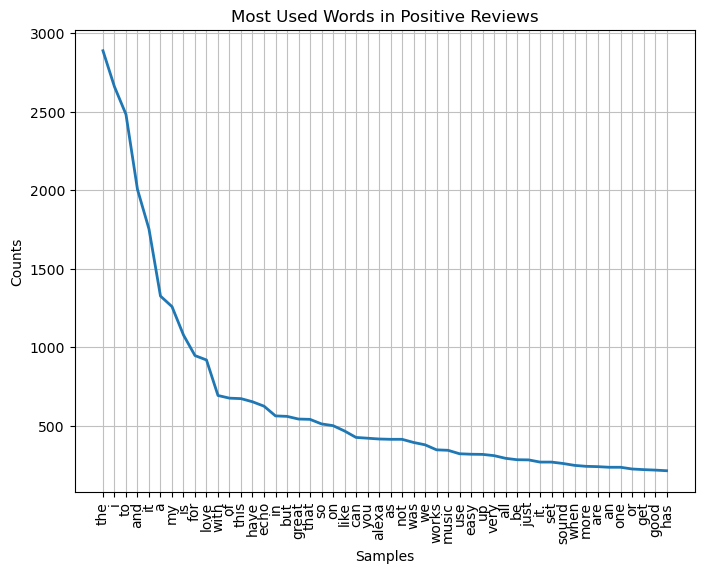

In [64]:
plt.subplots(figsize=(8,6))
plt.title("Most Used Words in Positive Reviews")
positiveFD.plot(50)
plt.show()

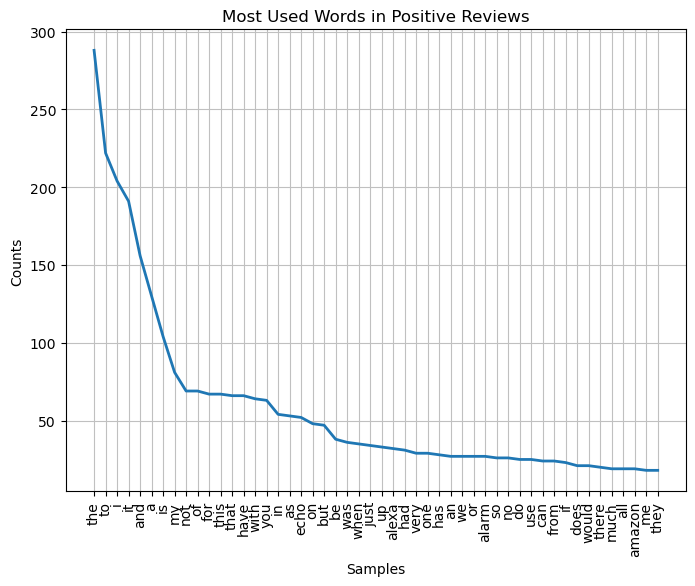

In [66]:
plt.subplots(figsize=(8,6))
plt.title("Most Used Words in Positive Reviews")
negativeFD.plot(50)
plt.show()

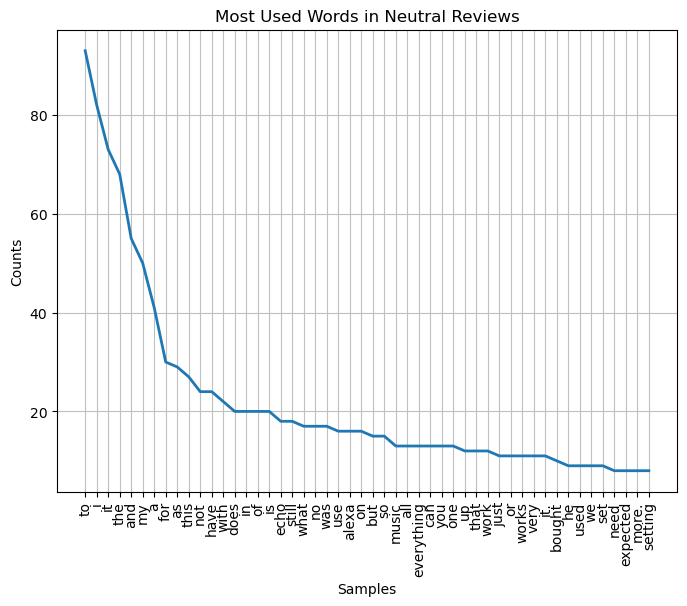

In [68]:
plt.subplots(figsize=(8,6))
plt.title("Most Used Words in Neutral Reviews")
neutralDF.plot(50)
plt.show()

In [70]:
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocess(text):
    cleanedData = []

    lemma = WordNetLemmatizer()
    swords = set(stopwords.words("english"))  # Convert list to set for faster membership checking
    
    # Define a list of negation words
    negation_words = ["not", "no", "never"]
    
    # Initialize a flag to track negation context
    negation = False
    
    # Cleaning links
    text = re.sub(r'http\S+', '', text)
    
    # Cleaning everything except alphabetical and numerical characters
    text = re.sub("[^a-zA-Z0-9]"," ",text)
    
    # Tokenizing and lemmatizing
    words = nltk.word_tokenize(text.lower())
    for word in words:
        if word in negation_words:
            negation = True
        elif word in swords:
            negation = False  # Reset negation flag for stopwords
        else:
            if negation:
                word += "_NEG"  # Append '_NEG' suffix for words in negation context
            word = lemma.lemmatize(word)
            cleanedData.append(word)
    
    # Joining
    processed_text = " ".join(cleanedData)
    
    return processed_text

# Assuming df_with_sentiment is your DataFrame with a 'Review' column
df_with_sentiment['Review'].apply(preprocess)

0                                               love echo
1                                                   loved
2       sometimes playing game answer question correct...
3       lot fun thing 4 yr old learns dinosaur control...
4                                                   music
                              ...                        
3065                           perfect kid adult everyone
3066    listening music searching location checking ti...
3067    love thing running entire home tv light thermo...
3068    complaint sound quality great mostly use comma...
3069                                                 good
Name: Review, Length: 3070, dtype: object

In [72]:
df_with_sentiment

,Review,Sentiment
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,0
...,...,...
3065,"Perfect for kids, adults and everyone in betwe...",1
3066,"Listening to music, searching locations, check...",0
3067,"I do love these things, i have them running my...",1
3068,Only complaint I have is that the sound qualit...,1


In [114]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler

# Assuming you have X and y defined
X = df_with_sentiment[['Review']]  # Convert X to a DataFrame with a single column
y = df_with_sentiment['Sentiment']

# Instantiate the RandomOverSampler
oversampler = RandomOverSampler()

# Resample the data
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Splitting the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Vectorizing the text data
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train['Review'])  # Access the 'Review' column
X_test_vectorized = vectorizer.transform(X_test['Review'])        # Access the 'Review' column

# Creating and training the SVM model with balanced class weights
svm_model = SVC(kernel='linear')  # No need to specify class_weight='balanced' because oversampling handles imbalance
svm_model.fit(X_train_vectorized, y_train)

# Making predictions
y_pred = svm_model.predict(X_test_vectorized)

# Printing the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

          -1       0.99      1.00      0.99       485
           0       0.98      1.00      0.99       548
           1       1.00      0.97      0.98       551

    accuracy                           0.99      1584
   macro avg       0.99      0.99      0.99      1584
weighted avg       0.99      0.99      0.99      1584



In [122]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocess(text):
    cleanedData = []

    lemma = WordNetLemmatizer()
    swords = stopwords.words("english")
    
    # Define a list of negation words
    negation_words = ["not", "no", "never"]
    
    # Initialize a flag to track negation context
    negation = False
    
    # Cleaning links
    text = re.sub(r'http\S+', '', text)
    
    # Cleaning everything except alphabetical and numerical characters
    text = re.sub("[^a-zA-Z0-9]"," ",text)
    
    # Tokenizing and lemmatizing
    words = nltk.word_tokenize(text.lower())
    for word in words:
        if word in negation_words:
            negation = True
        elif word in swords:
            negation = False  # Reset negation flag for stopwords
        else:
            if negation:
                word += "_NEG"  # Append '_NEG' suffix for words in negation context
            word = lemma.lemmatize(word)
            cleanedData.append(word)
    
    # Joining
    processed_text = " ".join(cleanedData)
    
    return processed_text


your_text = "Not so g"
processed_text = preprocess(your_text)

# Vectorize the processed text
vectorized_text = vectorizer.transform([processed_text])

# Make predictions
predicted_sentiment = svm_model.predict(vectorized_text)[0]

# Interpret results
if predicted_sentiment == -1:
    print("Negative Sentiment")
elif predicted_sentiment == 0:
    print("Neutral Sentiment")
else:
    print("Positive Sentiment")

Neutral Sentiment


In [73]:
predictions = model.predict(x_test)

NameError: name 'model' is not defined

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

def preprocess(text):
    cleanedData = []

    lemma = WordNetLemmatizer()
    swords = stopwords.words("english")
    
    # Define a list of negation words
    negation_words = ["not", "no", "never"]
    
    # Initialize a flag to track negation context
    negation = False
    
    # Cleaning links
    text = re.sub(r'http\S+', '', text)
    
    # Cleaning everything except alphabetical and numerical characters
    text = re.sub("[^a-zA-Z0-9]"," ",text)
    
    # Tokenizing and lemmatizing
    words = nltk.word_tokenize(text.lower())
    for word in words:
        if word in negation_words:
            negation = True
        elif word in swords:
            negation = False  # Reset negation flag for stopwords
        else:
            if negation:
                word += "_NEG"  # Append '_NEG' suffix for words in negation context
            word = lemma.lemmatize(word)
            cleanedData.append(word)
    
    # Joining
    processed_text = " ".join(cleanedData)
    
    return processed_text


your_text = "The sound quality is not the best"
processed_text = preprocess(your_text)

# Vectorize the processed text
vectorized_text = vectorizer.transform([processed_text])

# Make predictions
predicted_sentiment = model.predict(vectorized_text)[0]

# Interpret results
if predicted_sentiment == -1:
    print("Negative Sentiment")
elif predicted_sentiment == 0:
    print("Neutral Sentiment")
else:
    print("Positive Sentiment")